<a href="https://colab.research.google.com/github/gabrielmprata/MVP_SP03_Engenharia_de_Dados/blob/main/MVP_SP03_Engenharia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

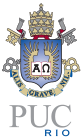 <font size="4"> **MVP Engenharia de dados**

---
>
**Pós-Graduação em Ciência de Dados e Analytics**
>
**Sprint 03**
>
**Aluno**: Gabriel Prata
>
**Data**: 14/08/2023
>
---

><font color=red>.:: Atenção professores ::.
>
Por favor, clicar em **"Open in colab"** para que seja possivel visualizar os gráficos interativos.
>
Obrigado!

#**<font color=#85d338> 1. Objetivo**


---

O mercado de banda larga fixa vem crescendo cada vez mais no Brasil, gerando uma grande concorrência entre empresas de telecomunicações.
>
Cada vez mais, os brasileiros desejam ter em casa uma conexão de alta velocidade e de grande estabilidade, e esse cenário é um efeito da modernização da infraestrutura de telecomunicações no país.
>
Trata-se de um movimento cujo início beneficiou principalmente grandes centros urbanos, mas que foi expandindo gradualmente para cidades pequenas e bairros mais afastados.
Não resta dúvida hoje em dia, que a banda larga mais eficaz é a Fibra óptica.
>
A ANATEL(Agência Nacional de Telecomunicações) divulgou em seu portal de dados, que em 2022 o Brasil registrou 44,9 milhões de acessos de banda larga fixa, e que 70% desses acessos, são de Fibra Óptica.
>
Com um mercado tão aquecido, tendo um crescimento de 6.7% em relação a 2021, a empresa Oi, nos pede uma analise do panorama do mercado de Fibra Óptica no Brasil.


#**<font color=#85d338> 2. Coleta de Dados**


---



Os dados foram coletados do sítio da Agência Nacional de Telecomunicações.
>
https://informacoes.anatel.gov.br/paineis/acessos
>
Arquivos:
>
Acessos_Banda_Larga_Fixa_2021.csv
>
Acessos_Banda_Larga_Fixa_2022.csv




---



#**<font color=#85d338> 3. Carga de Dados**


---

**<font color=#85d338> Iniciando as bibliotecas**

In [3]:
# Importação de pacotes
import pandas as pd
import numpy as np
import missingno as ms # para tratamento de missings

#bibliotecas para visualização de dados
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

#biblioteca para extrair arquivos compactados
!pip install patool
import patoolib

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

**<font color=#85d338> Descompactando o arquivo**

In [4]:
patoolib.extract_archive('Acessos_Fibra.zip')

patool: Extracting Acessos_Fibra.zip ...
patool: running /usr/bin/7z x -o./Unpack_qx9vfsme -- Acessos_Fibra.zip
patool: ... Acessos_Fibra.zip extracted to `Acessos_Fibra.csv'.


'Acessos_Fibra.csv'

**<font color=#85d338> Importando dados do CSV para um dataframe**

In [5]:
#Arquivo detalhado com os meses em linhas
acessos_fibra = pd.read_csv('Acessos_Fibra.csv', encoding="utf_8", sep=',')


In [6]:
#apagando os arquivos que não serão mais utilizados

!rm Acessos_Fibra.csv


**<font color=#85d338> Importando planilha com as Cidades aonde a Oi opera**

In [7]:
cidades = pd.read_excel('Municipios_FTTH_Jan23.xls')

In [8]:
cidades['cidade'] = 'OI'

In [9]:
cidades.head()

,Reg,UF,MUNICIPIO,cod_IBGE,cidade
0,RCN,DF,BRASILIA,5300108,OI
1,RCN,AM,MANAUS,1302603,OI
2,RCN,GO,GOIANIA,5208707,OI
3,RNE,BA,SALVADOR,2927408,OI
4,RNE,PE,RECIFE,2611606,OI


**<font color=#85d338> Importando planilha com as regiões do Brasil**

In [10]:
regiao_br = pd.read_excel('regioes.xls')

In [11]:
regiao_br.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UF      27 non-null     object
 1   regiao  27 non-null     object
dtypes: object(2)
memory usage: 560.0+ bytes


#**<font color=#85d338> 4. Analise Inicial - Qualidade de dados**

In [12]:
#Informações do dataframe
acessos_fibra.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3905690 entries, 0 to 3905689
Data columns (total 17 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   Unnamed: 0             int64 
 1   Ano                    int64 
 2   Mês                    int64 
 3   Grupo Econômico        object
 4   Empresa                object
 5   CNPJ                   int64 
 6   Porte da Prestadora    object
 7   UF                     object
 8   Município              object
 9   Código IBGE Município  int64 
 10  Faixa de Velocidade    object
 11  Velocidade             object
 12  Tecnologia             object
 13  Meio de Acesso         object
 14  Tipo de Pessoa         object
 15  Tipo de Produto        object
 16  Acessos                int64 
dtypes: int64(6), object(11)
memory usage: 3.0 GB


In [13]:
#Quantidade de lihas e colunas
acessos_fibra.shape

(3905690, 17)

In [14]:
#Quantidades de Nulos/NaN
acessos_fibra.isnull().sum()

Unnamed: 0               0
Ano                      0
Mês                      0
Grupo Econômico          0
Empresa                  0
CNPJ                     0
Porte da Prestadora      0
UF                       0
Município                0
Código IBGE Município    0
Faixa de Velocidade      0
Velocidade               0
Tecnologia               0
Meio de Acesso           0
Tipo de Pessoa           0
Tipo de Produto          0
Acessos                  0
dtype: int64

Dataframe sem registros NULOS.

In [15]:
#Exibindo as primeiras linhas do dataframe
acessos_fibra.head()

,Unnamed: 0,Ano,Mês,Grupo Econômico,Empresa,CNPJ,Porte da Prestadora,UF,Município,Código IBGE Município,Faixa de Velocidade,Velocidade,Tecnologia,Meio de Acesso,Tipo de Pessoa,Tipo de Produto,Acessos
0,0,2021,12,OUTROS,Click Networks Tls Ltda,43046927000175,Pequeno Porte,MS,Três Lagoas,5008305,> 34Mbps,"80,000000",FTTH,Fibra,Pessoa Física,INTERNET,9
1,1,2021,12,OUTROS,TURBO NET TELECOM LTDA,9366952000106,Pequeno Porte,SP,Embaúba,3514957,12Mbps a 34Mbps,"25,000000",FTTH,Fibra,Pessoa Física,INTERNET,10
2,2,2021,12,OUTROS,TURBO NET TELECOM LTDA,9366952000106,Pequeno Porte,SP,Palmares Paulista,3535101,> 34Mbps,"200,000000",FTTH,Fibra,Pessoa Física,INTERNET,34
3,3,2021,12,OUTROS,IMPACTNET INSTALADORA DE EQUIPAMENTOS DE COMUN...,22007662000126,Pequeno Porte,PR,Curitiba,4106902,> 34Mbps,"76,700000",FTTH,Fibra,Pessoa Física,INTERNET,1
4,4,2021,12,OUTROS,NETLINE TECNOLOGIA EM TELECOMUNICAÇÕES LTDA,6292667000191,Pequeno Porte,PB,São José de Piranhas,2514503,> 34Mbps,"100,000000",FTTH,Fibra,Pessoa Física,INTERNET,58


In [16]:
acessos_fibra[['Acessos']].describe().round(1)

,Acessos
count,3905690.0
mean,95.8
std,1564.9
min,1.0
25%,1.0
50%,3.0
75%,19.0
max,617566.0


><font color=#85d338>Distribuição dos atributos

>Nessa etapa, iremos verificar a distribuição dos principais atributos. Para ver se existe a necessidade de tomar alguma ação de transformações na etapa de preparação de dados.


---

><font color=#85d338>Grupo Econômico

In [17]:
acessos_fibra.groupby('Grupo Econômico').size().sort_values(ascending=False)

Grupo Econômico
OUTROS                  2448471
OI                       520232
TELECOM AMERICAS         258832
ALGAR (CTBC TELECOM)     189466
EB FIBRA                  88753
TELEFÔNICA                83253
VERO                      69497
UNIFIQUE                  68542
LIGGA TELECOM             67301
TRIPLE PLAY               31659
BRISANET                  31302
TELECOM ITALIA            20876
BT                        16527
AZZA TELECOM              10259
TELEFONICA                  445
SKY/AT&T                    171
DATORA                      104
dtype: int64

><font color=#85d338>Porte da Prestadora

In [18]:
acessos_fibra.groupby('Porte da Prestadora').size().sort_values(ascending=False)

Porte da Prestadora
Pequeno Porte    3021881
Grande Porte      883809
dtype: int64

><font color=#85d338>Faixa de velocidade e Velocidade

In [19]:
acessos_fibra.groupby('Faixa de Velocidade').size().sort_values(ascending=False)

Faixa de Velocidade
> 34Mbps           2567019
2Mbps a 12Mbps      521848
12Mbps a 34Mbps     507780
512kbps a 2Mbps     223239
0Kbps a 512Kbps      85804
dtype: int64

In [20]:
acessos_fibra.groupby('Velocidade').size().sort_values(ascending=False)

Velocidade
100,000000    327218
50,000000     246693
200,000000    221046
300,000000    189675
10,000000     180891
               ...  
578,120000         1
578,86             1
100,22             1
100,210000         1
155,65             1
Length: 8241, dtype: int64

**<font color=#85d338> Remover Colunas que não serão utilizadas**


In [21]:
# removendo as colunas
acessos_fibra.drop(['CNPJ',
                     #'Porte da Prestadora',
                     'Tipo de Pessoa'
                     #'Código IBGE Município'
                     ], axis=1, inplace= True)



In [22]:
#Renomeando as colunas
acessos_fibra.rename(columns={ 'Município': 'municipio',
                                'Faixa de Velocidade': 'faixa_velocidade',
                                'Tipo de Produto': 'tipo_produto',
                                'Empresa': 'empresa',
                                'Código IBGE Município': 'codigo_ibge',
                                'Grupo Econômico': 'grupo_economico',
                                'Meio de Acesso': 'meio_acesso',
                                'Mês': 'mes',
                                'Ano': 'ano'
                                },
                      inplace=True)


**<font color=#85d338> Ajustes dos dados**

In [23]:
#A empresa "EB FIBRA" passa a se chamar "ALLOHA" e comprou a empresa "XP SERVICOS DE COMUNICACAO LTDA"

acessos_fibra.loc[acessos_fibra.empresa=='XP SERVICOS DE COMUNICACAO LTDA','grupo_economico']='ALLOHA'
acessos_fibra.loc[acessos_fibra.empresa=='EB FIBRA','grupo_economico']='ALLOHA'
acessos_fibra.loc[acessos_fibra.empresa=='EB FIBRA','empresa']='ALLOHA'
acessos_fibra.loc[acessos_fibra.empresa=='XP SERVICOS DE COMUNICACAO LTDA','empresa']='ALLOHA'


# simplificar o nome de algumas empresas para facilitar na exibição dos gráficos
acessos_fibra.loc[acessos_fibra.empresa=='Desktop - Sigmanet Comunicacao Multimidia S.a.','grupo_economico']='Desktop'
acessos_fibra.loc[acessos_fibra.empresa=='ALGAR (CTBC TELECOM)','grupo_economico']='ALGAR TELECOM'
acessos_fibra.loc[acessos_fibra.empresa=='Desktop - Sigmanet Comunicacao Multimidia S.a.','empresa']='Desktop'
acessos_fibra.loc[acessos_fibra.empresa=='ALGAR (CTBC TELECOM)','empresa']='ALGAR TELECOM'


#**<font color=#85d338> 5. Pré-processamento de dados**


---

Nessa etapa, iremos construir todos os DATAFRAMES necessários para realizar as análises.

###**<font color=#85d338> 5.1 Criando dataframe com as info da OI 2021/2022**

In [24]:
acessos_fibra_oi = acessos_fibra[(acessos_fibra['empresa'] == 'OI') & (acessos_fibra['meio_acesso'] == 'Fibra')].copy()

In [25]:
#Agrupando e criando as colunas com as variações

hist_oi_y = acessos_fibra_oi.groupby(["ano","mes"])['Acessos'].sum().reset_index()

hist_oi_y['Acessos'] = ((hist_oi_y['Acessos'])/1000000).round(2)

hist_oi_y['ano_mes'] = hist_oi_y['ano'].map(str) + hist_oi_y['mes'].map(str)

hist_oi_y.ano_mes =  hist_oi_y.ano_mes.replace('20221','202201')
hist_oi_y.ano_mes =  hist_oi_y.ano_mes.replace('20222','202202')
hist_oi_y.ano_mes =  hist_oi_y.ano_mes.replace('20223','202203')
hist_oi_y.ano_mes =  hist_oi_y.ano_mes.replace('20224','202204')
hist_oi_y.ano_mes =  hist_oi_y.ano_mes.replace('20225','202205')
hist_oi_y.ano_mes =  hist_oi_y.ano_mes.replace('20226','202206')
hist_oi_y.ano_mes =  hist_oi_y.ano_mes.replace('20227','202207')
hist_oi_y.ano_mes =  hist_oi_y.ano_mes.replace('20228','202208')
hist_oi_y.ano_mes =  hist_oi_y.ano_mes.replace('20229','202209')

hist_oi_y['acesso_ant'] = hist_oi_y.Acessos.shift(1)
hist_oi_y['var_acesso'] = (((hist_oi_y['Acessos']/hist_oi_y['acesso_ant'])*100)-100).round(2)

In [26]:
cresc = hist_oi_y[['ano_mes', 'Acessos']]
cresc = cresc[(hist_oi_y['mes'] == 12)]
cresc['202112'] = cresc.Acessos.shift(1)
cresc['202112'].fillna(0, inplace=True)
cresc['novos_acessos'] = ((cresc['Acessos']-cresc['202112'])).round(2)
cresc['crescimento%'] = (((cresc['Acessos']/cresc['202112'])*100)-100).round(1)
cresc[(cresc['ano_mes'] == '202212')]

,ano_mes,Acessos,202112,novos_acessos,crescimento%
12,202212,4.23,3.69,0.54,14.6


>**<font color=#85d338> Criando Gráfico com as info da OI 2021/2022**

In [27]:
fig1 = px.bar(hist_oi_y, x="ano_mes", y="Acessos",
             #color='Score',
             template="plotly_dark",
             text_auto=True,
             height=500, #altura
             width=1000,  #largura
             color_discrete_sequence=["#85d338"],
             labels=dict(ano_mes=" Ano Mês", Acessos = "Acessos (MM)"),
             title = "Quantidade de Acessos FIBRA em 2022")
fig1.update_traces(textposition='outside')
fig1.update_yaxes(showticklabels=False)
fig1.update_xaxes(showgrid=False)
fig1.update_yaxes(showgrid=False)
fig1.update_layout(xaxis = dict(linecolor='rgba(0,0,0,1)', # adicionando linha em y = 0
                                tickmode = 'array', # alterando o modo dos ticks
                                tickvals = hist_oi_y['ano_mes'], # setando a posição do tick de x
                                ticktext = hist_oi_y['ano_mes']),# setando o valor do tick de x
                                title_x = 0.5) #centralizando o titulo

fig1.show()

fig2 = px.bar(hist_oi_y, x="ano_mes", y="var_acesso",
             template="plotly_dark",
             text_auto=True,
             height=300, #altura
             width=1000,  #largura
             color_discrete_sequence=["#85d338"],
             labels=dict(mes="Mês", var_acesso = "Acessos"),
             title = "Variação MxM(%)")
fig2.update_traces(textposition='inside')
fig2.update_yaxes(showticklabels=False)
fig2.update_xaxes(showgrid=False)
fig2.update_yaxes(showgrid=False)
fig2.update_layout(xaxis = dict(
                                tickmode = 'array', # alterando o modo dos ticks
                                tickvals = hist_oi_y['ano_mes'], # setando a posição do tick de x
                                ticktext = hist_oi_y['ano_mes'])# setando o valor do tick de x
                                )
fig2.update_xaxes(visible=False, fixedrange=True)
fig2.update_yaxes(visible=False, fixedrange=True)


###**<font color=#85d338> 5.2 Criando dataframe Market Share com as Cidades que a OI atua**

In [28]:
#Todas as CIDADES que a OI opera
tb_cidades_2022 = acessos_fibra[(acessos_fibra['mes'] == 12) & (acessos_fibra['ano'] == 2022)].groupby(["empresa","codigo_ibge"])['Acessos'].sum().reset_index()

#Merge dos dataframes. Obs: Por default, a junção é INNER JOIN. Caso queira mudar, usar how='left'
tb_cidades_2022 = pd.merge(tb_cidades_2022, cidades, left_on=['codigo_ibge'], right_on=['cod_IBGE'])

tb_cidades_gr = tb_cidades_2022.groupby(['empresa'])['Acessos'].sum().reset_index()
cidades_tot = sum(tb_cidades_gr.Acessos) #Total de acessos

tb_cidades_gr['market_share'] = ((tb_cidades_gr['Acessos']/cidades_tot)*100).round(2)

tb_cidades_gr = tb_cidades_gr.sort_values(by='market_share', ascending=False).head(10)
tb_cidades_gr

,empresa,Acessos,market_share
2452,OI,4156850,24.60
3413,VIVO,3743427,22.15
133,ALLOHA,652073,3.86
378,BRISANET,612877,3.63
3189,TIM,526094,3.11
515,CLARO,434826,2.57
3356,VERO,342910,2.03
3289,UNIFIQUE,289821,1.72
1833,LIGGA TELECOM,230264,1.36
3216,TRIPLE PLAY,216762,1.28


>**<font color=#85d338> Criando Gráfico com as info de Market Share**

In [29]:
fig3 = px.bar(tb_cidades_gr, x='market_share', y='empresa', color='empresa', orientation='h',
             template="plotly_dark",
             title = "Market Share das 10 principais Empresas, onde a Oi atua",
             height=500, #altura
             width=1000,  #largura
             labels=dict(empresa=" ", market_share=""),
             hover_name="empresa",
             #hover_data={'empresa':False, 'Acessos':True, 'Acessos':':,.0f', 'ranking':True},
             text_auto='2f',
             color_discrete_map={
              'VIVO': '#8e38d3','OI': '#85d338', 'ALLOHA':'#1d1160', 'BRISANET':'#FF4500', 'CLARO':'#cc0000','Desktop':'#FFC72C','ALGAR TELECOM':'#0066b2','VERO':'#EE82EE','America Net S.a.':'#72A0C1','UNIFIQUE':'#034694','TIM':'#012169'
              }

             )
fig3.update_layout(showlegend=False)
fig3.update_layout(xaxis_ticksuffix = "%")
fig3.update_layout(title_x = 0.5) #centralizando o titulo
fig3.show()

###**<font color=#85d338> 5.3 Criando dataframe Líder, com as Cidades que a OI atua**

In [30]:
#Aproveitando a tabela anterior para criar um rank de municipio, empresa
#cria dataframe resumido
tb_cidades_rk = tb_cidades_2022.groupby(['empresa','MUNICIPIO'])['Acessos'].sum().reset_index()

#ordenando
tb_cidades_rk = tb_cidades_rk.sort_values(by=['MUNICIPIO','Acessos'], ascending=[True, False])
#criando o rank
tb_cidades_rk['rank'] = tb_cidades_rk.groupby(['MUNICIPIO'])['Acessos'].rank(ascending=False)


tb_cidades_rk[(tb_cidades_rk['rank'] == 1) & (tb_cidades_rk['empresa'] == 'OI')].sort_values(by=['Acessos'], ascending=False)

,empresa,MUNICIPIO,Acessos,rank
5984,OI,RIO DE JANEIRO,285484,1.0
5797,OI,BRASILIA,177742,1.0
5839,OI,CURITIBA,168559,1.0
5792,OI,BELO HORIZONTE,159991,1.0
5992,OI,SALVADOR,129880,1.0
...,...,...,...,...
5929,OI,MORRINHOS,1980,1.0
5900,OI,JUINA,1819,1.0
5916,OI,MARACAJU,1530,1.0
5836,OI,CORUMBA,1145,1.0


###**<font color=#85d338> 5.4 Criando dataframe Market Share com TODAS as Cidades(Municípios)**

In [31]:
# Dataframe com todas as Cidades
mktshare = (acessos_fibra[['empresa', 'grupo_economico', 'Acessos']]
            [(acessos_fibra['ano'] == 2022) & (acessos_fibra['mes'] == 12)]
            ).groupby(['empresa', 'grupo_economico'])['Acessos'].sum().reset_index()

mktshare_tot = sum(mktshare.Acessos) #Total de acessos

mktshare['market_share'] = ((mktshare['Acessos']/mktshare_tot)*100).round(2)
mktshare['ranking'] = (mktshare["Acessos"].rank(ascending = False)).astype(int)
gr_mktshare = mktshare.sort_values(by='market_share', ascending=False).head(11)

> Criando gráfico

In [32]:
fig4 = px.bar(gr_mktshare, x='market_share', y='empresa', color='empresa', orientation='h',
             template="plotly_dark",
             title = "Market Share das 11 principais Empresas",
             height=500, #altura
             width=1000,  #largura
             labels=dict(empresa=" ", market_share=""),
             hover_name="empresa",
             hover_data={'empresa':False, 'Acessos':True, 'Acessos':':,.0f', 'ranking':True},
             text_auto='2f',
             color_discrete_map={
              'VIVO': '#8e38d3','OI': '#85d338', 'ALLOHA':'#1d1160', 'BRISANET':'#FF4500', 'CLARO':'#cc0000','Desktop':'#FFC72C','ALGAR TELECOM':'#0066b2','VERO':'#EE82EE','America Net S.a.':'#72A0C1','UNIFIQUE':'#034694','TIM':'#012169'
              }

             )
fig4.update_layout(showlegend=False)
fig4.update_layout(xaxis_ticksuffix = "%")
fig4.update_layout(title_x = 0.5) #centralizando o titulo
fig4.show()



---



In [48]:
#Dataframe Sem a UF SP, pois nesse estado a concorrência é fechada
mktshare_sp = (acessos_fibra[['empresa', 'grupo_economico', 'Acessos']]
            [(acessos_fibra['ano'] == 2022) & (acessos_fibra['mes'] == 12) & (acessos_fibra['UF'] != 'SP')]
            ).groupby(['empresa', 'grupo_economico'])['Acessos'].sum().reset_index()

mktshare_tot_sp = sum(mktshare_sp.Acessos) #Total de acessos

mktshare_sp['market_share'] = ((mktshare_sp['Acessos']/mktshare_tot_sp)*100).round(2)
mktshare_sp['ranking'] = (mktshare_sp["Acessos"].rank(ascending = False)).astype(int)
gr_mktshare_sp = mktshare_sp.sort_values(by='market_share', ascending=False).head(10)

In [49]:
fig5 = px.bar(gr_mktshare_sp, x='market_share', y='empresa', color='empresa', orientation='h',
             template="plotly_dark",
             title = "Market Share das 10 principais Empresas",
             height=500, #altura
             width=1000,  #largura
             labels=dict(empresa=" ", market_share=""),
             hover_name="empresa",
             hover_data={'empresa':False, 'Acessos':True, 'Acessos':':,.0f', 'ranking':True},
             text_auto='2f',
             color_discrete_map={
              'VIVO': '#8e38d3','OI': '#85d338', 'ALLOHA':'#1d1160', 'BRISANET':'#FF4500', 'CLARO':'#cc0000','Desktop':'#FFC72C','ALGAR TELECOM':'#0066b2','VERO':'#EE82EE','America Net S.a.':'#72A0C1','UNIFIQUE':'#034694','TIM':'#012169'
              }

             )
fig5.update_layout(showlegend=False)
fig5.update_layout(xaxis_ticksuffix = "%")
fig5.update_layout(title_x = 0.5) #centralizando o titulo
fig5.show()

In [35]:
#Todos os MUNICIPIOS
tb_municipio_2022 = acessos_fibra_oi[['codigo_ibge','municipio','Acessos']][(acessos_fibra_oi['mes'] == 12) & (acessos_fibra['ano'] == 2022) ]
tb_municipio_2022 = tb_municipio_2022.groupby(['codigo_ibge','municipio']).sum(['Acessos']).reset_index()

tb_municipio_2021 = acessos_fibra_oi[['codigo_ibge','municipio','Acessos']][(acessos_fibra_oi['mes'] == 12) & (acessos_fibra['ano'] == 2021)]
tb_municipio_2021 = tb_municipio_2021.groupby(['codigo_ibge','municipio']).sum(['Acessos']).reset_index()

# Criando um dataframe do pandas, para receber os resultados das 2 tabelas anteriores
dataframe = [[0,0,0,0]]
tb_municipio_cresc = pd.DataFrame(dataframe, columns=['municipios_2021', 'municipios_2022', 'crescimento', 'percentual'])

tb_municipio_cresc['municipios_2021'] = tb_municipio_2021['codigo_ibge'].nunique()
tb_municipio_cresc['municipios_2022'] = tb_municipio_2022['codigo_ibge'].nunique()
tb_municipio_cresc['crescimento'] = tb_municipio_cresc['municipios_2022']-tb_municipio_cresc['municipios_2021']
tb_municipio_cresc['percentual'] = (((tb_municipio_cresc['municipios_2022']/tb_municipio_cresc['municipios_2021'])-1)*100).round(2)
tb_municipio_cresc

,municipios_2021,municipios_2022,crescimento,percentual
0,5146,5141,-5,-0.1


###**<font color=#85d338> 5.5 Criando dataframe Crescimento por região**

In [36]:
#Analise somente com a Oi
tb_regiao_2022 = acessos_fibra_oi[['UF','Acessos']][(acessos_fibra_oi['mes'] == 12) & (acessos_fibra_oi['ano'] == 2022)]
tb_regiao_2022 = tb_regiao_2022.groupby(['UF']).sum(['Acessos']).reset_index()
tb_regiao_2021 = acessos_fibra_oi[['UF','Acessos']][(acessos_fibra_oi['mes'] == 12) & (acessos_fibra_oi['ano'] == 2021)]
tb_regiao_2021 = tb_regiao_2021.groupby(['UF']).sum(['Acessos']).reset_index()

tb_regiao_2022 = pd.merge(tb_regiao_2022, regiao_br, left_on='UF', right_on='UF')
tb_regiao_2021 = pd.merge(tb_regiao_2021, regiao_br, left_on='UF', right_on='UF')

tb_regiao_2022 = tb_regiao_2022.groupby(['regiao']).sum(['Acessos']).reset_index()
tb_regiao_2021 = tb_regiao_2021.groupby(['regiao']).sum(['Acessos']).reset_index()

tb_regiao_2022.rename(columns={'Acessos': '202212'}, inplace=True)
tb_regiao_2021.rename(columns={'Acessos': '202112'}, inplace=True)

tb_regiao_cresc = pd.merge(tb_regiao_2021, tb_regiao_2022, left_on='regiao', right_on='regiao')
tb_regiao_cresc['crescimento'] = tb_regiao_cresc['202212']-tb_regiao_cresc['202112']
tb_regiao_cresc['percentual'] = (((tb_regiao_cresc['202212']/tb_regiao_cresc['202112'])-1)*100).round(1)
tb_regiao_cresc

,regiao,202112,202212,crescimento,percentual
0,CENTRO-OESTE,535419,638185,102766,19.2
1,NORDESTE,589073,612188,23115,3.9
2,NORTE,437014,500764,63750,14.6
3,SUDESTE,1223285,1381804,158519,13.0
4,SUL,909404,1101086,191682,21.1


In [37]:
#Analise sem a Oi
tb_regiao_2022x = acessos_fibra[['UF','Acessos']][(acessos_fibra['ano'] == 2022) & (acessos_fibra['mes'] == 12) & (acessos_fibra['empresa'] != 'OI') & (acessos_fibra['meio_acesso'] == 'Fibra')]
tb_regiao_2022x = tb_regiao_2022x.groupby(['UF']).sum(['Acessos']).reset_index()
tb_regiao_2021x = acessos_fibra[['UF','Acessos']][(acessos_fibra['ano'] == 2021) & (acessos_fibra['mes'] == 12)  & (acessos_fibra['empresa'] != 'OI') & (acessos_fibra['meio_acesso'] == 'Fibra')]
tb_regiao_2021x = tb_regiao_2021x.groupby(['UF']).sum(['Acessos']).reset_index()

tb_regiao_2022x = pd.merge(tb_regiao_2022x, regiao_br, left_on='UF', right_on='UF')
tb_regiao_2021x = pd.merge(tb_regiao_2021x, regiao_br, left_on='UF', right_on='UF')

tb_regiao_2022x = tb_regiao_2022x.groupby(['regiao']).sum(['Acessos']).reset_index()
tb_regiao_2021x = tb_regiao_2021x.groupby(['regiao']).sum(['Acessos']).reset_index()

tb_regiao_2022x.rename(columns={'Acessos': '202212'}, inplace=True)
tb_regiao_2021x.rename(columns={'Acessos': '202112'}, inplace=True)

tb_regiao_crescx = pd.merge(tb_regiao_2021x, tb_regiao_2022x, left_on='regiao', right_on='regiao')
tb_regiao_crescx['crescimento'] = tb_regiao_crescx['202212']-tb_regiao_crescx['202112']
tb_regiao_crescx['percentual'] = (((tb_regiao_crescx['202212']/tb_regiao_crescx['202112'])-1)*100).round(1)
tb_regiao_crescx

,regiao,202112,202212,crescimento,percentual
0,CENTRO-OESTE,1368233,1766386,398153,29.1
1,NORDESTE,4147051,5068887,921836,22.2
2,NORTE,743194,999421,256227,34.5
3,SUDESTE,11664903,14012717,2347814,20.1
4,SUL,4496891,5330017,833126,18.5


###**<font color=#85d338> 5.5 Criando dataframe Market Share por UF**

In [38]:
tb_uf_2022 = acessos_fibra[['UF','grupo_economico','Acessos']][(acessos_fibra['ano'] == 2022) & (acessos_fibra['mes'] == 12) & (acessos_fibra['meio_acesso'] == 'Fibra')]
tb_uf_2022 = tb_uf_2022.groupby(['UF','grupo_economico']).sum(['Acessos']).reset_index()
pv_uf_2022 = pd.pivot_table(tb_uf_2022, index=['grupo_economico'], aggfunc='sum', columns=['UF'], values=['Acessos'],fill_value=0).apply(lambda x: x*100/sum(x)).round(2)
pv_uf_2022.style.background_gradient(cmap='Greens').format("{:.1f}%")

###**<font color=#85d338> 5.6 Criando dataframe evolução das velocidades contratadas**

In [39]:
tb_velocidade = acessos_fibra[(acessos_fibra['mes'] == 12) & (acessos_fibra['ano'] == 2022) & (acessos_fibra['Porte da Prestadora'] == 'Grande Porte')].groupby(['ano','mes','empresa', 'Velocidade'])['Acessos'].sum().reset_index()
tb_velocidade1 = acessos_fibra[(acessos_fibra['mes'] == 12) & (acessos_fibra['ano'] == 2021) & (acessos_fibra['Porte da Prestadora'] == 'Grande Porte')].groupby(['ano','mes','empresa', 'Velocidade'])['Acessos'].sum().reset_index()

tb_velocidade = pd.concat([tb_velocidade, tb_velocidade1], sort=False, ignore_index=True)
tb_velocidade['ano_mes'] = tb_velocidade['ano'].map(str) + tb_velocidade['mes'].map(str)

tb_velocidade['Velocidade'] = (tb_velocidade['Velocidade'].str.replace(',','.')).astype('float')

tb_velocidade

,ano,mes,empresa,Velocidade,Acessos,ano_mes
0,2022,12,CLARO,0.0001,20,202212
1,2022,12,CLARO,0.0024,2,202212
2,2022,12,CLARO,0.0040,5,202212
3,2022,12,CLARO,0.0041,1,202212
4,2022,12,CLARO,0.0048,1,202212
...,...,...,...,...,...,...
827,2021,12,VIVO,70000.0000,7,202112
828,2021,12,VIVO,8.0000,787,202112
829,2021,12,VIVO,80000.0000,8,202112
830,2021,12,VIVO,800000.0000,2,202112


>**<font color=#85d338> Criando dataframe com um novo agrupamento de velocidade**

In [40]:
classes = [0, 33, 50, 100, 200, 300,400,500, 10000000]

labels = ['< 34Mbps', 'Entre 34 e 50Mbps', 'Entre 50 e 100Mbps', 'Entre 100 e 200Mbps',
          'Entre 200 e 300Mbps','Entre 300 e 400Mbps','Entre 400 e 500Mbps','500 +']

classes = pd.cut(x=tb_velocidade.Velocidade, bins=classes, labels=labels)
tb_velocidade['Velocidade_Agrupada'] = classes

tb_velocidade


,ano,mes,empresa,Velocidade,Acessos,ano_mes,Velocidade_Agrupada
0,2022,12,CLARO,0.0001,20,202212,< 34Mbps
1,2022,12,CLARO,0.0024,2,202212,< 34Mbps
2,2022,12,CLARO,0.0040,5,202212,< 34Mbps
3,2022,12,CLARO,0.0041,1,202212,< 34Mbps
4,2022,12,CLARO,0.0048,1,202212,< 34Mbps
...,...,...,...,...,...,...,...
827,2021,12,VIVO,70000.0000,7,202112,500 +
828,2021,12,VIVO,8.0000,787,202112,< 34Mbps
829,2021,12,VIVO,80000.0000,8,202112,500 +
830,2021,12,VIVO,800000.0000,2,202112,500 +


In [ ]:
#SUM(CASE WHEN)
pv_velocidade = tb_velocidade.groupby(['empresa','Velocidade_Agrupada'], as_index=False).apply(lambda x: pd.Series({'202112':x.loc[x.ano_mes=='202112']['Acessos'].sum(),
                                                                            '202212':x.loc[x.ano_mes=='202212']['Acessos'].sum()}))


In [42]:
#Criando uma Pivot
pv_faixa = pd.pivot_table(tb_velocidade[tb_velocidade.ano_mes=='202212'], index=['empresa'], aggfunc='sum', columns=['Velocidade_Agrupada'], values=['Acessos'],fill_value=0)

pv_faixa.style.background_gradient(cmap='Greens').format("{:,}")

#**<font color=#85d338> 6. Analise final - Solução do problema**


---

<font size="4"> A OI fechou o ano de 2022 com **4,23 milhões** de acessos em banda larga por fibra ótica em todo o país.

In [43]:
fig1.show()
fig2.show()

<font size="4"> Durante o ano passado, foram conectados **540 mil novos acessos**, o que representa um **crescimento de 14,6%** em comparação com 2021.

In [ ]:
cresc[(cresc['ano_mes'] == '202212')]

,ano_mes,Acessos,202112,novos_acessos,crescimento%
12,202212,4.23,3.69,0.54,14.6


<font size="4"> Considerando a tecnologia fibra, os acessos de Oi Fibra representam **25,3% do market share nas cidades onde atua com fibra**, o que evidencia o resultado positivo da estratégia da companhia de investir na expansão dos serviços digitais e de conexão por fibra ótica.

In [44]:
fig3.show()

<font size="4"> Considerando todas as cidades Brasileiras a Oi fica com **13,48%** do market share.

In [45]:
fig4.show()

<font size="4"> Desconsiderando o estado de SP, a Oi fica com **18,49%** do market share. (A concessão de serviço em SP é mandatória para a Telefonica)

In [50]:
fig5.show()

<font size="4"> A OI é líder em acessos em FIBRA em 84 cidades brasileiras.

In [51]:
tb_cidades_rk[(tb_cidades_rk['rank'] == 1) & (tb_cidades_rk['empresa'] == 'OI')].sort_values(by=['Acessos'], ascending=False)

,empresa,MUNICIPIO,Acessos,rank
5984,OI,RIO DE JANEIRO,285484,1.0
5797,OI,BRASILIA,177742,1.0
5839,OI,CURITIBA,168559,1.0
5792,OI,BELO HORIZONTE,159991,1.0
5992,OI,SALVADOR,129880,1.0
...,...,...,...,...
5929,OI,MORRINHOS,1980,1.0
5900,OI,JUINA,1819,1.0
5916,OI,MARACAJU,1530,1.0
5836,OI,CORUMBA,1145,1.0


<font size="4"> A performance da Oi se destaca também na participação da empresa na evolução de novos acessos no mercado de internet por fibra ótica. Ao longo de 2022, a Oi Fibra deteve **29,9%** do market share das novas adições em todo o país, considerando apenas os grandes provedores, segundo classificação da Anatel. Desconsiderando o mercado do estado de São Paulo, esse percentual sobe para **45,1%**.

In [ ]:
tb_gross_cresc.sort_values(by='market_share', ascending=False)

,Empresa,Total_Gross,market_share
3,VIVO,874151,48.4
1,OI,539832,29.9
0,CLARO,261947,14.5
2,TIM,131306,7.3


In [ ]:
tb_gross_cresc_sp.sort_values(by='market_share', ascending=False)

,Empresa,Total_Gross,market_share
1,OI,535940,45.1
3,VIVO,379997,32.0
0,CLARO,190097,16.0
2,TIM,81430,6.9


> **<font color=#85d338> Mercado por Região**

<font size="4">O maior destaque vai para as **regiões Centro Oeste e Sul**, onde o crescimento da Oi Fibra superou inclusive o percentual de crescimento do mercado. **No Centro Oeste, a Oi Fibra cresceu 19,2%**, acima dos 17,2% do mercado total da região. **Na região Sul, o crescimento da Oi Fibra foi de 21,1%**, contra 19,6% do crescimento total do mercado.

In [ ]:
# Somente OI
tb_regiao_cresc.sort_values(by='percentual', ascending=False)

,regiao,202112,202212,crescimento,percentual
4,Sul,909404,1101086,191682,21.1
0,Centro-Oeste,535419,638185,102766,19.2
2,Norte,437014,500764,63750,14.6
3,Sudeste,1223285,1381804,158519,13.0
1,Nordeste,589073,612188,23115,3.9


In [ ]:
# Todas as operadoradoras
tb_regiao_crescx.sort_values(by='percentual', ascending=False)

,regiao,202112,202212,crescimento,percentual
2,Norte,743194,999421,256227,34.5
0,Centro-Oeste,1368233,1766386,398153,29.1
1,Nordeste,4147051,5068887,921836,22.2
3,Sudeste,11664903,14012717,2347814,20.1
4,Sul,4496891,5330017,833126,18.5


<font size="4">Os dados do balanço de 2022, com base nos dados da Anatel de dezembro, mostram ainda o avanço da Oi na sua estratégia de liderança no mercado de fibra ótica, já que a empresa fechou o ano de 2022 líder em acessos em banda larga de fibra ótica em **15 estados**, incluindo o DF. Segundo o relatório, a Oi Fibra tem **59,7% do mercado de banda larga no Acre, 37,5% no Amazonas, na Bahia com 17,6%, Distrito Federal (41,8%), Goiás (27,3%), Maranhão (22,4%), Mato Grosso do Sul (28,1%), Mato Grosso (19,7%), Pará (25,5%), Paraná (21,4%), Rio de Janeiro (37,4%), Rondônia (39,4%), Roraima (64,8%), Rio Grande do Sul (19,0%) e Tocantins (23,8%)**

In [ ]:
pv_uf_2022.style.background_gradient(cmap='Greens').format("{:.1f}%")

> **<font color=#85d338> Mercado por Velocidade**

<font size="4"> Oi Fibra também avançou em relação à velocidade da conexão por fibra, apresentando em 2022 o maior crescimento na velocidade média, entre as prestadoras de grande porte. A Oi Fibra cresceu 42,3% na velocidade média, bem acima do crescimento de 26,7% da segunda colocada e de 26,2% da terceira colocada.

In [ ]:
pv_faixa.style.background_gradient(cmap='Greens').format("{:,}")